In [1]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
os.getcwd()

'D:\\sc_2018_BASE\\scripts\\summarize\\notebooks'

In [3]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Wed, 22 Jul 2020 15:22


In [4]:
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format
relative_path = '../../../outputs'

# Commute Mode by Workplace Geography

In [5]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_workplace_geog.csv'))

# Add mode share by work_place field
_df = df.groupby('work_place').sum()[['modeled','observed']].reset_index()
_df = _df.merge(df, on='work_place', suffixes=['_geog_total','_mode_total'])
_df['observed_mode_share'] = _df['observed_mode_total']/_df['observed_geog_total']
_df['modeled_mode_share'] = _df['modeled_mode_total']/_df['modeled_geog_total']
_df[['work_place','mode','modeled_mode_total','observed_mode_total','percent_diff','diff','modeled_mode_share','observed_mode_share']]

,work_place,mode,modeled_mode_total,observed_mode_total,percent_diff,diff,modeled_mode_share,observed_mode_share
0,Auburn,auto,9491,33431,-0.72,-23940,0.93,0.94
1,Auburn,transit,266,691,-0.62,-425,0.03,0.02
2,Auburn,walk_and_bike,492,1355,-0.64,-863,0.05,0.04
3,Bellevue,auto,37403,96761,-0.61,-59358,0.93,0.84
4,Bellevue,transit,1519,12505,-0.88,-10986,0.04,0.11
5,Bellevue,walk_and_bike,1179,6464,-0.82,-5285,0.03,0.06
6,Everett,auto,48724,81741,-0.40,-33017,0.90,0.92
7,Everett,transit,2982,2766,0.08,216,0.06,0.03
8,Everett,walk_and_bike,2470,3961,-0.38,-1491,0.05,0.04
9,Federal Way,auto,11565,27590,-0.58,-16025,0.95,0.93


r^2 : 0.81803311012


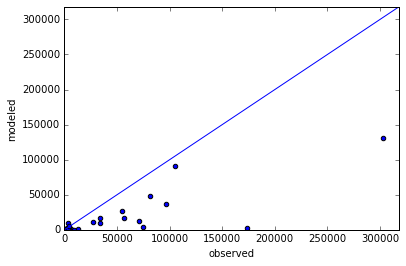

In [6]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Shares by Work Place
----

In [7]:
df_tot = df.groupby(['work_place']).sum()[['modeled','observed']].reset_index()
df_shares = df.merge(df_tot, on='work_place', suffixes=['','_total'])
df_shares['mode_share_modeled'] = df_shares['modeled']/df_shares['modeled_total']
df_shares['mode_share_observed'] = df_shares['observed']/df_shares['observed_total']
df_shares.rename(columns={'mode_share_modeled': 'modeled', 'mode_share_observed': 'observed',
                         'modeled': '_', 'observed': '__'}, inplace=True)
df_shares = df_shares[['work_place','modeled','observed','mode']]
df_shares['percent_diff'] = (df_shares['modeled']-df_shares['observed'])/df_shares['observed']
df_shares['diff'] = df_shares['modeled']-df_shares['observed']

## Auto

In [8]:
_df = df_shares[df_shares['mode'] == 'auto']
_df

,work_place,modeled,observed,mode,percent_diff,diff
0,Auburn,0.93,0.94,auto,-0.02,-0.02
3,Bellevue,0.93,0.84,auto,0.12,0.10
6,Everett,0.90,0.92,auto,-0.03,-0.02
9,Federal Way,0.95,0.93,auto,0.02,0.02
12,Kent,0.94,0.92,auto,0.02,0.02
15,Kirkland,0.94,0.87,auto,0.09,0.07
18,Redmond,0.95,0.85,auto,0.12,0.10
21,Renton,0.93,0.91,auto,0.03,0.02
24,Seattle,0.95,0.55,auto,0.72,0.40
27,Tacoma,0.87,0.94,auto,-0.08,-0.07


r^2 : -0.378659611523


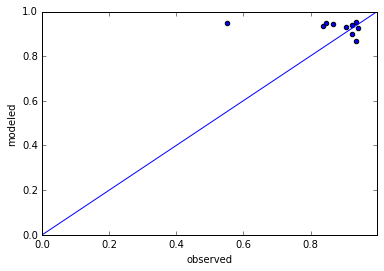

In [9]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Transit

In [10]:
_df = df_shares[df_shares['mode'] == 'transit']
_df

,work_place,modeled,observed,mode,percent_diff,diff
1,Auburn,0.03,0.02,transit,0.33,0.01
4,Bellevue,0.04,0.11,transit,-0.65,-0.07
7,Everett,0.06,0.03,transit,0.76,0.02
10,Federal Way,0.02,0.00,transit,4.23,0.02
13,Kent,0.02,0.05,transit,-0.51,-0.02
16,Kirkland,0.02,0.09,transit,-0.76,-0.07
19,Redmond,0.02,0.11,transit,-0.83,-0.09
22,Renton,0.02,0.04,transit,-0.48,-0.02
25,Seattle,0.02,0.32,transit,-0.94,-0.30
28,Tacoma,0.09,0.03,transit,2.04,0.06


r^2 : -0.284057598039


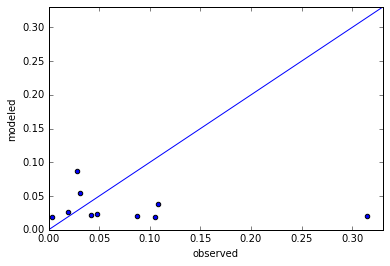

In [11]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Walk and Bike

In [12]:
_df = df_shares[df_shares['mode'] == 'walk_and_bike']
_df

,work_place,modeled,observed,mode,percent_diff,diff
2,Auburn,0.05,0.04,walk_and_bike,0.26,0.01
5,Bellevue,0.03,0.06,walk_and_bike,-0.47,-0.03
8,Everett,0.05,0.04,walk_and_bike,0.02,0.00
11,Federal Way,0.03,0.06,walk_and_bike,-0.52,-0.03
14,Kent,0.04,0.03,walk_and_bike,0.31,0.01
17,Kirkland,0.04,0.05,walk_and_bike,-0.18,-0.01
20,Redmond,0.04,0.05,walk_and_bike,-0.29,-0.01
23,Renton,0.05,0.05,walk_and_bike,-0.05,-0.00
26,Seattle,0.03,0.14,walk_and_bike,-0.76,-0.10
29,Tacoma,0.05,0.03,walk_and_bike,0.36,0.01


r^2 : -0.418262808771


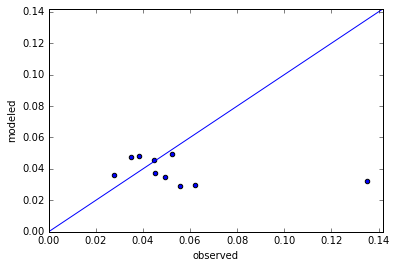

In [13]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Share by Home Tract
----

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))
pd.options.display.float_format = '{:0,.0f}'.format

In [15]:
df_county = df.groupby('CountyName').sum()[['modeled','observed']].reset_index()
df_county

,CountyName,modeled,observed
0,King,"471,048","1,032,519"
1,Kitsap,"140,489","111,998"
2,Pierce,"379,321","374,996"
3,Snohomish,"675,724","368,546"


In [16]:
def calculate_shares(df, geog_col, apply_format=False):
    
    df[['modeled','observed']] = df[['modeled','observed']].astype('int')
    df_total = df.groupby(geog_col).sum()[['modeled','observed']].reset_index()
    df_total.rename(columns={'modeled': 'modeled_total','observed':'observed_total'}, inplace=True)
    df = df.merge(df_total, on=geog_col, how='left')
    df['modeled_share'] = df['modeled']*1.0/df['modeled_total']
    df['observed_share'] = df['observed']*1.0/df['observed_total']
    if apply_format:
        df[['modeled_share','observed_share']] = df[['modeled_share','observed_share']].applymap(format_percent)
    
    return df

In [17]:
df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

## SOV

 r^2: -0.0943754115286


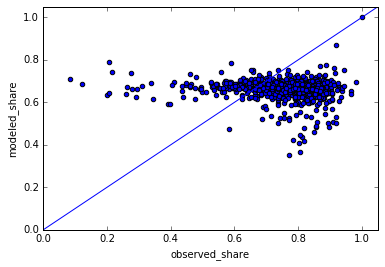

In [18]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## HOV

 r^2: -0.0152621712934


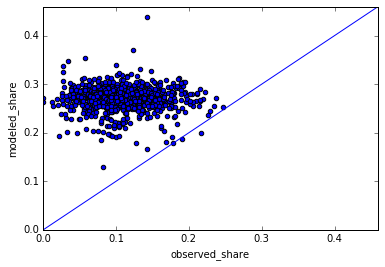

In [19]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## Transit

 r^2: -0.239450261712


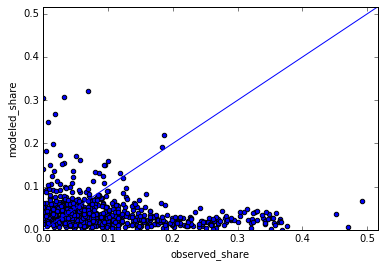

In [20]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## Walk

 r^2: -0.0223959521941


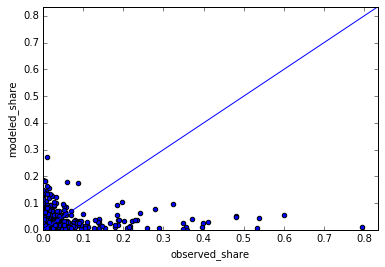

In [21]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)